#  IMAGE SENTIMENT CLASSIFIER

## 1. Install Dependencies and Setup

In [1]:
#!pip install tensorflow opencv-python matplotlib

In [2]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
agate                         1.7.1
agate-dbf                     0.2.2
agate-excel                   0.2.5
agate-sql                     0.5.9
aiohttp                       3.8.1
aiosignal                     1.2.0
alabaster                     0.7.12
anaconda-client               1.9.0
anaconda-navigator            2.3.2
anaconda-project              0.10.2
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
arviz                         0.14.0
astroid                       2.6.6
astropy                       5.0.4
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.1
atomicwrites                  1.4.0
attrs                         21.4.0
autoimpute                    0.13.0
Auto

In [3]:
import tensorflow as tf
import os

In [4]:
os.path.join('data', 'happy')

'data\\happy'

In [5]:
import cv2
import imghdr

In [6]:
data_dir = 'data' 

In [7]:
import os

# Specify the correct path to the 'data' directory
data_dir = r'C:\\Users\\DELL\\Untitled Folder 1\\data'

# Check if the directory exists
if os.path.exists(data_dir):
    # Continue with your code
    os.listdir(data_dir)
else:
    print("Directory does not exist: ", data_dir)

In [8]:
os.listdir(data_dir)

['happy', 'sad']

In [9]:
os.listdir(os.path.join(data_dir,'happy')) #this allows us to loop through every single photo in the data

['05-12-21-happy-people.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 '1-2.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 '154006829.jpg',
 '170404-happy-workers-feature.jpg',
 '1902539.jpg',
 '1902540.jpg',
 '1902587.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '200068052.jpg',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg',
 '8cxKy5g9i.jpg',
 '960x0.jpg',
 'A_Sep20_14_1189155141.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'blog_image_20180219221810890.jpg',
 'brady-bunch-3.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'friends-happy-190821-800x450.jpg',
 'GettyImages-565706549-949x534.jpg',
 'GettyImages-871518740-1

In [10]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [11]:
image_exts[2]

'bmp'

In [12]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

05-12-21-happy-people.jpg
07-120104-happy_people_are_not_nice_people.jpg
1-2.jpg
1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
11-Habits-of-Truly-Happy-People.jpg
154006829.jpg
170404-happy-workers-feature.jpg
1902539.jpg
1902540.jpg
1902587.jpg
1920px-face-smile.svg_.png.jpg
1HEoLBLidT2u4mhJ0oiDgig.png
200068052.jpg
227-2271622_happy-people-business-team-celebrating-png.png
7-Habits-of-Happy-People-image.jpeg
7-principles-of-successful-and-happy-people.png
7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg
8cxKy5g9i.jpg
960x0.jpg
A_Sep20_14_1189155141.jpg
bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg
blog_image_20180219221810890.jpg
brady-bunch-3.jpg
e162ccda8ce0f197f8863f327add9233.jpg
fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg
friends-happy-190821-800x450.jpg
GettyImages-565706549-949x534.jpg
GettyImages-871518740-1024x707.jpg
getty_152414899_97046097045006_68075.jpg
getty_478389113_970647970450091_99776.jpg
getty_494581822

In [13]:
# loads the image file as a NumPy array
img=cv2.imread(os.path.join('data','happy','154006829.jpg'))

In [14]:
type(img)

numpy.ndarray

In [15]:
img.shape

(3744, 5616, 3)

In [16]:
from matplotlib import pyplot as plt

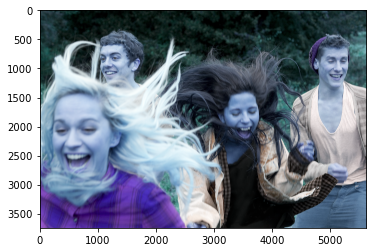

In [17]:
plt.imshow(img)

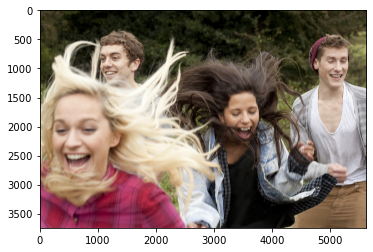

In [18]:
# the main difference between these two color models is the order in which the color channels are arranged
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [19]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

In [20]:
#tf.data.Dataset??

In [21]:
import numpy as np

In [22]:
#tf.keras.utils.image_dataset_from_directory??

In [23]:
# to create a labeled dataset from a directory structure containing image files.
data = tf.keras.utils.image_dataset_from_directory('data')

Found 173 files belonging to 2 classes.


In [24]:
data

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:
# to iterate over the dataset and obtain batches of data
data_iterator = data.as_numpy_iterator()

In [26]:
data_iterator

In [27]:
# get another batch from the iterator
batch = data_iterator.next()

In [28]:
batch

(array([[[[254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ],
          ...,
          [254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ]],
 
         [[254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ],
          ...,
          [254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ]],
 
         [[254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ],
          ...,
          [254.        , 254.        , 254.        ],
          [254.        , 254.        , 254.        ],
          [254.        , 254.  

In [29]:
#Images Represented as numpy arrays 
batch[0].shape

(32, 256, 256, 3)

In [30]:
batch[1]

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0])

####  Class 1 = Sad People
#### Class 0 = Happy People

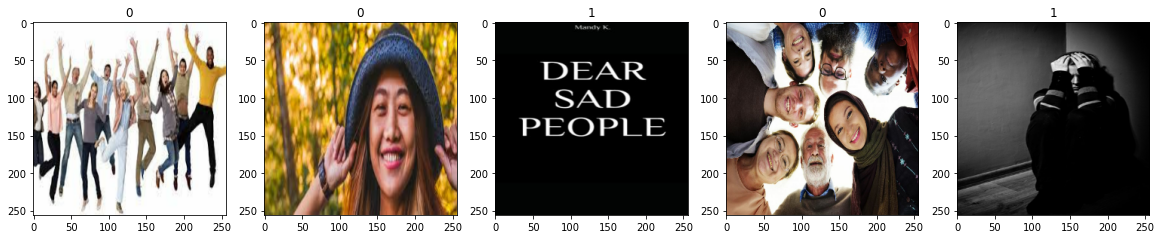

In [31]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [32]:
batch[0].min()

0.0

In [33]:
batch[0].max()

255.0

#  Preprocess data

###  Scale Data

In [34]:
data = data.map(lambda x,y: (x/255, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [35]:
scaled_iterator = data.as_numpy_iterator()

In [36]:
batch = scaled_iterator.next()

In [37]:
batch[0].max()

1.0

In [38]:
batch[0].min()

0.0

In [39]:
batch[1]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1])

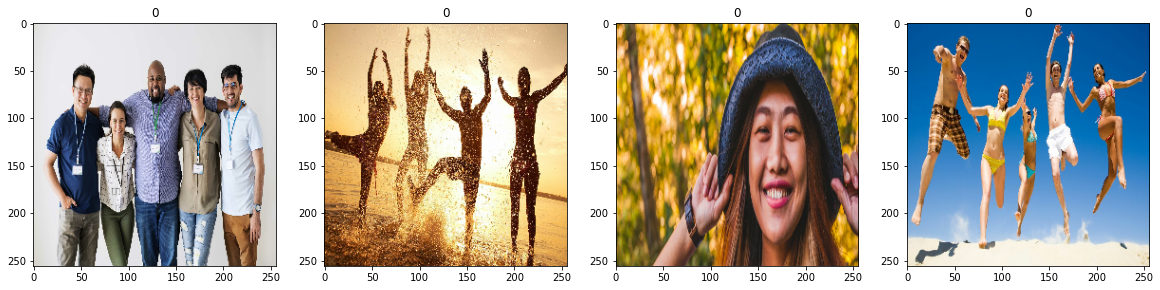

In [40]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### Split data

In [41]:
len(data)

6

In [42]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [43]:
train_size

4

In [44]:
test_size

1

In [45]:
val_size

1

In [46]:
val_size+test_size+train_size

6

In [47]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Build Deep Learning Model

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [49]:
  model = Sequential()

In [50]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))  #16 filters, each with a size of 3x3. The stride is set to 1
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())  #1D vector, which is necessary to connect the convolutional layers to fully connected layers.
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [51]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

#  Train

In [53]:
logdir='logs'

In [54]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [55]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 15s 3s/step - loss: 1.4920 - accuracy: 0.4922 - val_loss: 0.9613 - val_accuracy: 0.3750
Epoch 2/20
4/4 [==============================] - 9s 2s/step - loss: 0.7920 - accuracy: 0.4141 - val_loss: 0.5743 - val_accuracy: 0.6875
Epoch 3/20
4/4 [==============================] - 10s 2s/step - loss: 0.6389 - accuracy: 0.5781 - val_loss: 0.6999 - val_accuracy: 0.5625
Epoch 4/20
4/4 [==============================] - 9s 2s/step - loss: 0.6307 - accuracy: 0.5625 - val_loss: 0.5772 - val_accuracy: 0.5938
Epoch 5/20
4/4 [==============================] - 9s 2s/step - loss: 0.5875 - accuracy: 0.5625 - val_loss: 0.4728 - val_accuracy: 0.7188
Epoch 6/20
4/4 [==============================] - 9s 2s/step - loss: 0.5699 - accuracy: 0.6094 - val_loss: 0.5382 - val_accuracy: 0.6562
Epoch 7/20
4/4 [==============================] - 9s 2s/step - loss: 0.5292 - accuracy: 0.6797 - val_loss: 0.4823 - val_accuracy: 0.9062
Epoch 8/20
4/4 [=======================

# Plot Performance

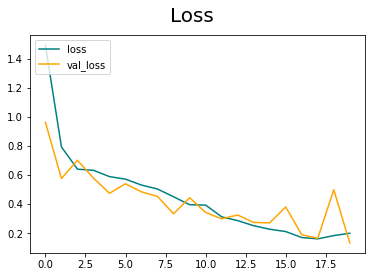

In [56]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

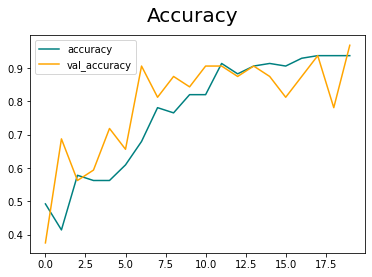

In [57]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [58]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [59]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [60]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 250ms/step


In [61]:
print(f'Precision:{pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall: 0.5, Accuracy:0.9230769276618958


# Test

In [62]:
import cv2

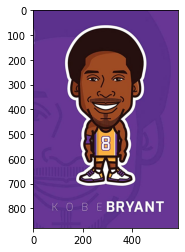

In [63]:
img = cv2.imread('C:\\Users\\DELL\\CNN image classifier\\data\\kobe.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

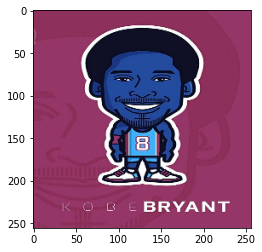

In [64]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [65]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 31ms/step


In [66]:
yhat

array([[0.8074099]], dtype=float32)

In [67]:
if yhat > 0.5: 
    print(f'Predicted class is Happy')
else:
    print(f'Predicted class is Sad')

Predicted class is Happy


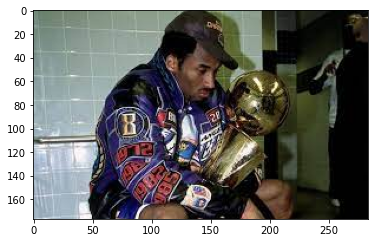

In [68]:
img = cv2.imread('C:\\Users\\DELL\\CNN image classifier\\data\\sad_kobe.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

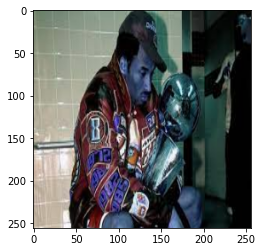

In [69]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [70]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 51ms/step


In [71]:
yhat

array([[0.3140644]], dtype=float32)

In [72]:
if yhat > 0.5: 
    print(f'Predicted class is Happy')
else:
    print(f'Predicted class is Sad')

Predicted class is Sad
